Data Summary:
          Vavuniya  Anuradhapura  Maha Illuppallama
count  1066.000000   1066.000000        1066.000000
mean      5.024719      4.534174           4.479540
std      13.843132     13.756689          12.612815
min       0.000000      0.000000           0.000000
25%       0.000000      0.000000           0.000000
50%       0.000000      0.000000           0.000000
75%       2.400000      1.200000           1.800000
max     189.200000    154.700000         118.900000

Missing Values:
Vavuniya             0
Anuradhapura         0
Maha Illuppallama    0
dtype: int64

Data Types:
Vavuniya             float64
Anuradhapura         float64
Maha Illuppallama    float64
dtype: object


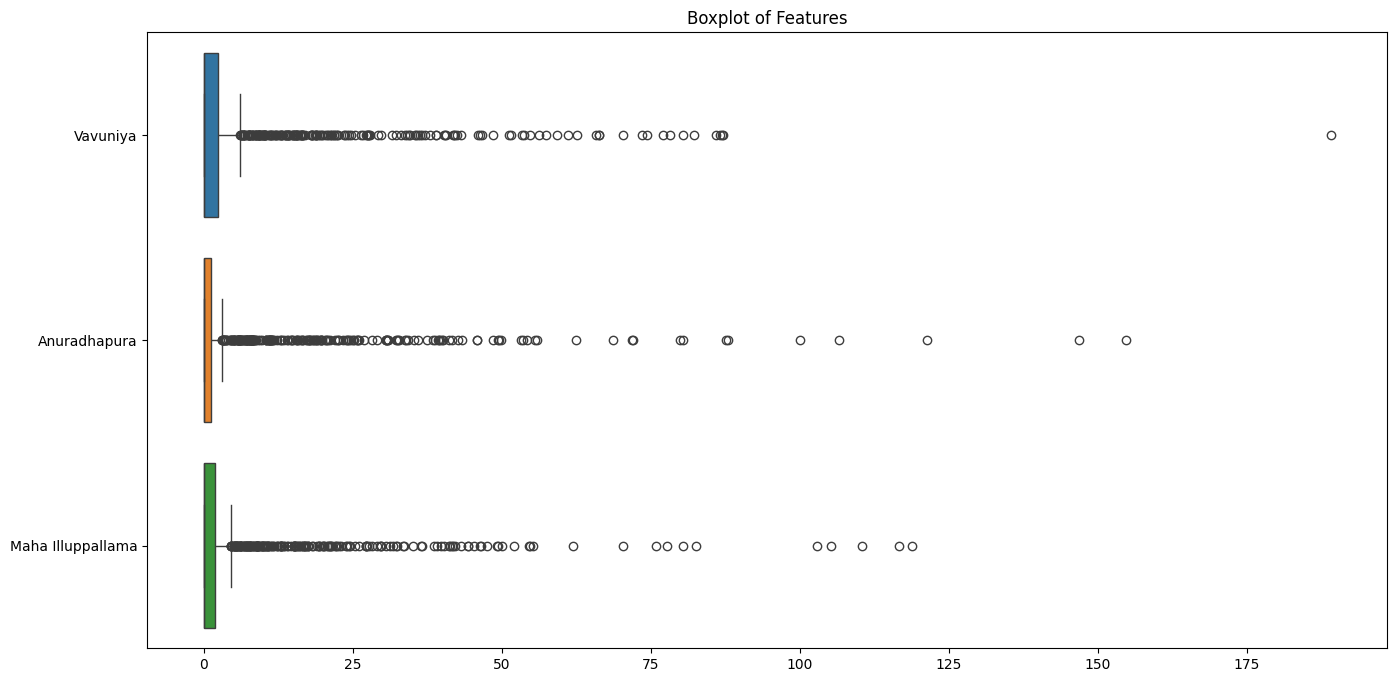

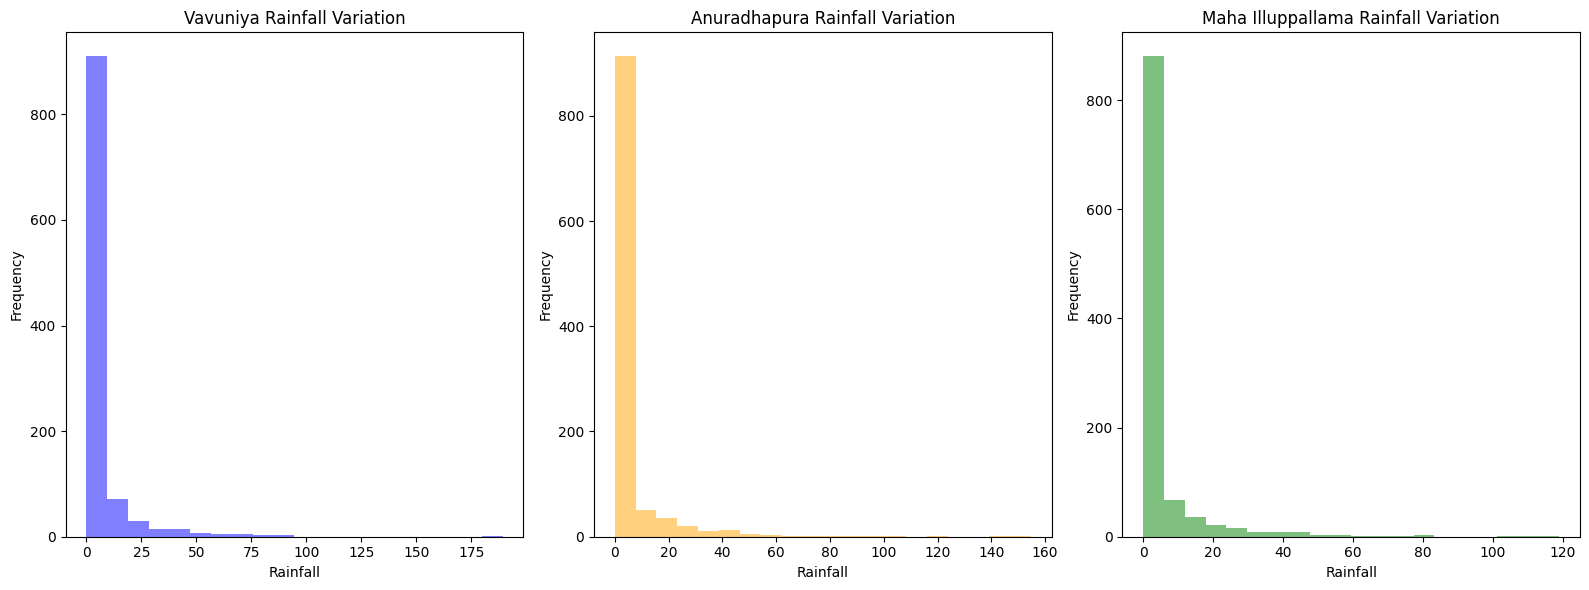


Variance of Rainfall in Vavuniya: 191.6322921742462
Variance of Rainfall in Anuradhapura: 189.2464994587286
Variance of Rainfall in Maha Illuppallama: 159.0830977227845

Bias in Vavuniya: 0.3452407754846769
Bias in Anuradhapura: -0.14530331457160717
Bias in Maha Illuppallama: -0.19993746091307152


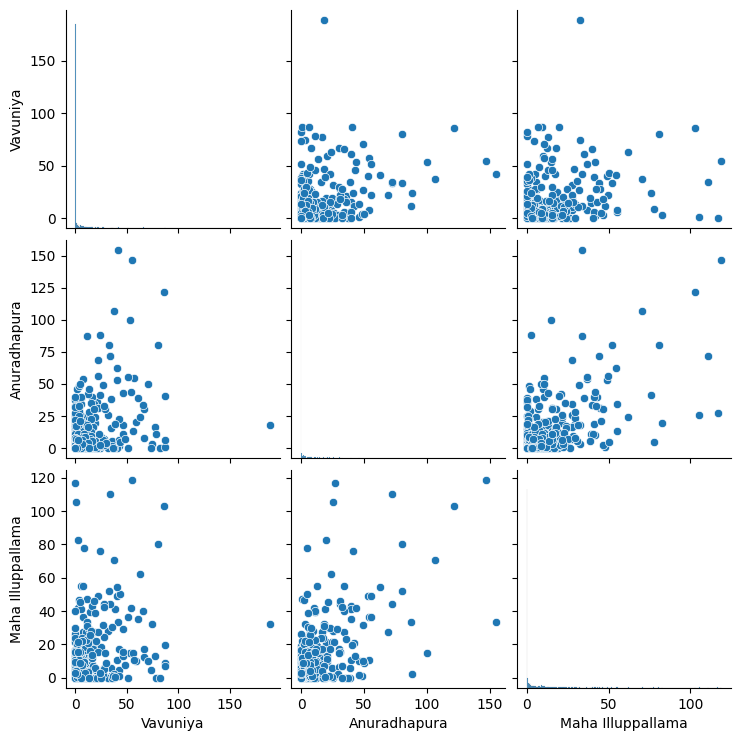

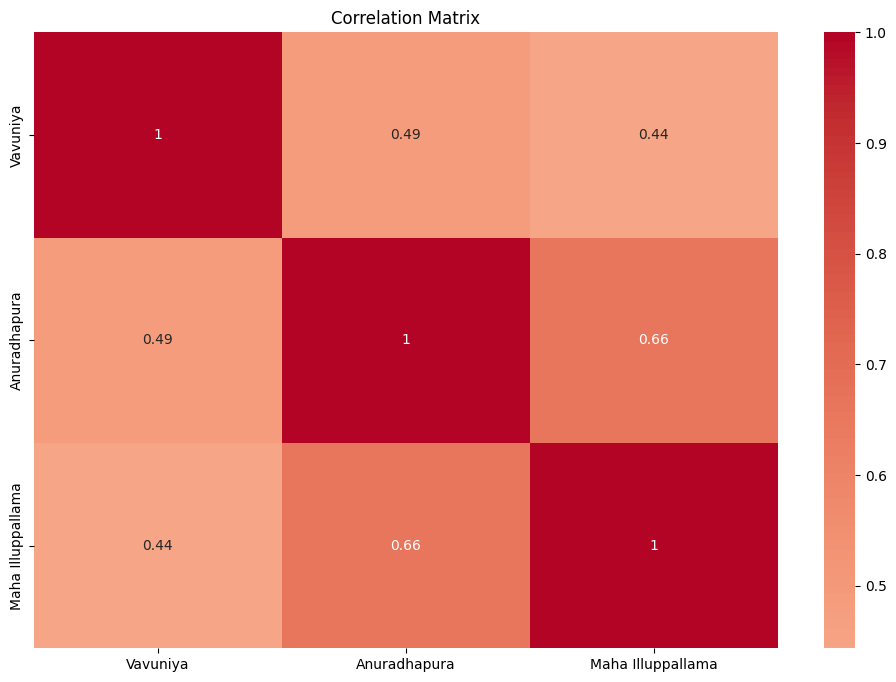

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the transformed dataset
transformed_data_path = 'transformed_rainfall_data.csv'
transformed_data = pd.read_csv(transformed_data_path)

# Ensure all feature columns are numeric and handle missing values
def preprocess_data(df):
    # Drop non-numeric columns
    df = df.select_dtypes(include=[np.number])
    # Fill missing values with the column mean
    df = df.fillna(df.mean())
    return df

# Preprocess the data
transformed_data = preprocess_data(transformed_data)

# Data Summary
print("Data Summary:")
print(transformed_data.describe())
# Display missing values and data types
print("\nMissing Values:")
print(transformed_data.isnull().sum())

print("\nData Types:")
print(transformed_data.dtypes)
# Visualize outliers using boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=transformed_data, orient="h")
plt.title('Boxplot of Features')
plt.show()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.hist(transformed_data['Vavuniya'], bins=20, alpha=0.5, color='blue')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Vavuniya Rainfall Variation')

plt.subplot(1, 3, 2)
plt.hist(transformed_data['Anuradhapura'], bins=20, alpha=0.5, color='orange')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Anuradhapura Rainfall Variation')

plt.subplot(1, 3, 3)
plt.hist(transformed_data['Maha Illuppallama'], bins=20, alpha=0.5, color='green')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Maha Illuppallama Rainfall Variation')

plt.tight_layout()
plt.show()

#Variance
variance_vavuniya = transformed_data['Vavuniya'].var()
variance_anuradhapura = transformed_data['Anuradhapura'].var()
variance_maha_illuppallama = transformed_data['Maha Illuppallama'].var()

print(f"\nVariance of Rainfall in Vavuniya: {variance_vavuniya}")
print(f"Variance of Rainfall in Anuradhapura: {variance_anuradhapura}")
print(f"Variance of Rainfall in Maha Illuppallama: {variance_maha_illuppallama}")

# check Bias
# Calculate the mean rainfall for each location
mean_vavuniya = transformed_data['Vavuniya'].mean()
mean_anuradhapura = transformed_data['Anuradhapura'].mean()
mean_maha_illuppallama = transformed_data['Maha Illuppallama'].mean()

# Calculate the overall mean rainfall
overall_mean = transformed_data[['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']].values.mean()

# Calculate the bias for each location
bias_vavuniya = mean_vavuniya - overall_mean
bias_anuradhapura = mean_anuradhapura - overall_mean
bias_maha_illuppallama = mean_maha_illuppallama - overall_mean

print(f"\nBias in Vavuniya: {bias_vavuniya}")
print(f"Bias in Anuradhapura: {bias_anuradhapura}")
print(f"Bias in Maha Illuppallama: {bias_maha_illuppallama}")


# Pairplot to visualize relationships between variables
sns.pairplot(transformed_data)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(transformed_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Split the data into features and target
X = transformed_data.drop(columns=['Vavuniya', 'Anuradhapura', 'Maha Illuppallama'])
y = transformed_data[['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
